# Nhi Le - Assignment 1 - Perceptron
## DATA 4319 - FALL 2020

In [1]:
#loading package for Plotting 
using Pkg
#Pkg.add("Plotly")

In [2]:
#loading parkage for dataset, using Rdataset
using RDatasets
using Plots
#plotly()
#theme(:dark)

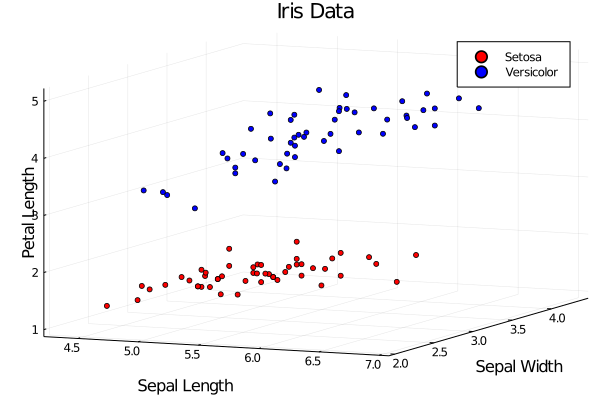

In [8]:
iris = dataset("datasets", "iris")
X_data = [x for x in zip(iris.SepalLength[1:100], iris.SepalWidth[1:100],iris.PetalLength[1:100])]
Y_data = [iris.Species[i] == "setosa" ? 1 : -1 for i = 1:100]

scatter(X_data[1:50], 
        label = "Setosa",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        zaxis = "Petal Length",
        markersize=3,
        title = "Iris Data",
        color="red")

scatter!(X_data[51:100],
        markersize=3,
        color="blue",
        label = "Versicolor")

In [9]:
Y_data

100-element Array{Int64,1}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

In [10]:
# Perceptron Activation Function 
function sign(weights, x) #similar to predict function
    x_new = push!(collect(x),1.0)
    return weights'x_new > 0 ? 1 : -1
end

# Perceptron Update Rule
function perceptron_update(weights, x, y)
    if sign(weights, x) != y
        weights += y*push!(collect(x),1.0)
    end
    return weights
end

# Error Count
function error(weights, feature_set, labels)
    return sum([sign(weights,feature_set[i]) != labels[i] ? 1 : 0 for i =1:length(feature_set)])
end

error (generic function with 1 method)

In [11]:
# Iterate the perceptron update rule by randomly testing entries in the dataset. 
# This is equivalent to what we will learn to be stochastic gradient descent.
function perceptron_learning_algorithm(num, feature_set,labels,e)
    count=10000
    weights=randn(num)
    error_measures=[]
    append!(error_measures,error(weights,feature_set,labels))
    
    weight_vector=[]
    weight=[]
    while error(weights,feature_set,labels)>e
    
        count=count-1
        
        for i=1:length(feature_set)
            weights=perceptron_update(weights,feature_set[i],labels[i])
        end
        
        append!(weight_vector,weights)
        append!(error_measures, error(weights,feature_set,labels))
               
        if count==0
            break
        end
    end
    
    return weights,weight_vector,error_measures
end

perceptron_learning_algorithm (generic function with 1 method)

In [12]:
# Test your functions
w,W, error_points= perceptron_learning_algorithm(4,X_data, Y_data,0)
error_points


# Plot your learned function
#plot!(x -> (-w[1]-w[2]*x)/w[3],4,8, label = "learned seperator")

7-element Array{Any,1}:
 50
 50
 50
 50
 50
 50
  0

In [13]:
W

24-element Array{Any,1}:
  -5.420264586321967
  -3.5586830435786587
  -5.156420807500264
  -4.100570327045963
  -2.4202645863219674
  -0.2586830435786589
  -7.056420807500264
  -3.100570327045963
  -4.320264586321968
   0.04131695642134092
 -10.356420807500264
  -3.100570327045963
  -1.3202645863219677
   3.3413169564213403
 -12.256420807500263
  -2.100570327045963
  -1.8202645863219677
   3.9413169564213404
 -14.456420807500262
  -2.100570327045963
   3.279735413678032
   7.441316956421341
 -13.056420807500261
  -1.100570327045963

In [14]:
function minmax_XY(X_data)
    x_tmp=[]
    y_tmp=[]
    for i = 1:length(X_data)
        append!(x_tmp,X_data[i][1])
    end
    for i = 1:length(X_data)
        append!(y_tmp,X_data[i][2])
    end
    
    return findmin(x_tmp)[1],findmax(x_tmp)[1],findmin(y_tmp)[1],findmax(y_tmp)[1]
end

xmin,xmax,ymin,ymax=minmax_XY(X_data)


(4.3, 7.0, 2.0, 4.4)

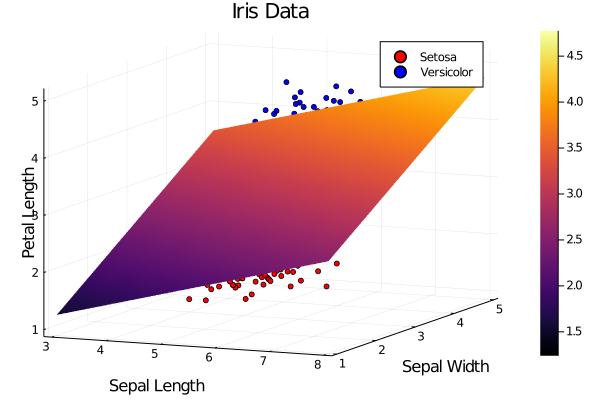

In [15]:
x=round(xmin,digits=0)-1:0.5:round(xmax,digits=0)+1
y=round(ymin,digits=0)-1:0.5:round(ymax,digits=0)+1
z_value(x,y)=(-w[1]*x-w[2]*y-w[4])/w[3]
surface!(x,y,z_value)

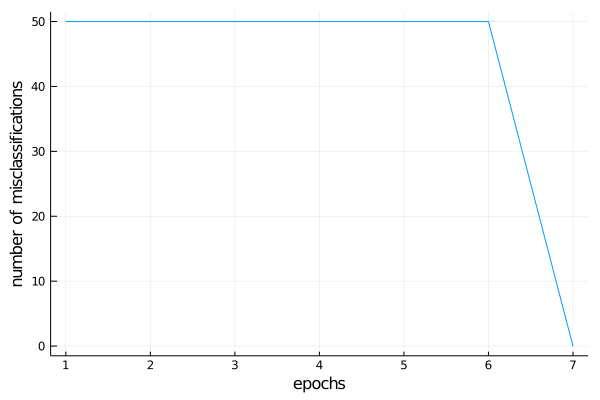

In [16]:
plot(error_points, 
    xaxis = "epochs", 
    yaxis = "number of misclassifications",
    legend = false)

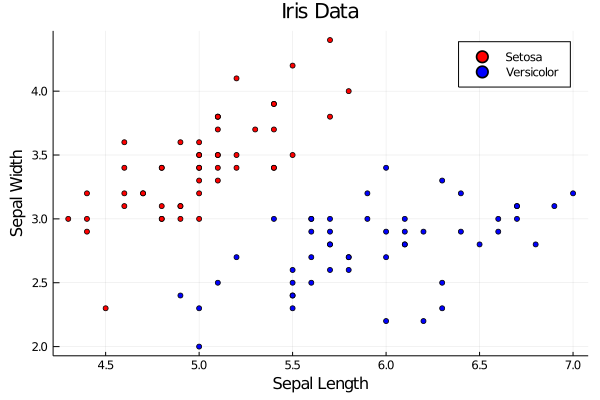

In [23]:
iris = dataset("datasets", "iris")
X_data1 = [x for x in zip(iris.SepalLength[1:100], iris.SepalWidth[1:100])]
Y_data1 = [iris.Species[i] == "setosa" ? 1 : -1 for i = 1:100]

scatter(X_data1[1:50], 
        label = "Setosa",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        zaxis = "Petal Length",
        markersize=3,
        title = "Iris Data",
        color ="red")

scatter!(X_data1[51:100],
        markersize=3,
        color="blue",
        label = "Versicolor")

In [29]:
w,W, error_points= perceptron_learning_algorithm(3,X_data1, Y_data1,0)
w

3-element Array{Float64,1}:
 -78.67551121297429
 100.07435734519059
 124.03101935002188

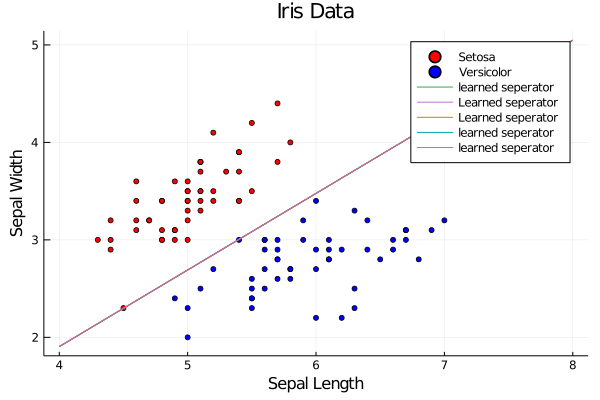

In [30]:
plot!(x -> (-w[3]-w[1]*x)/w[2],4,8, label = "learned seperator")

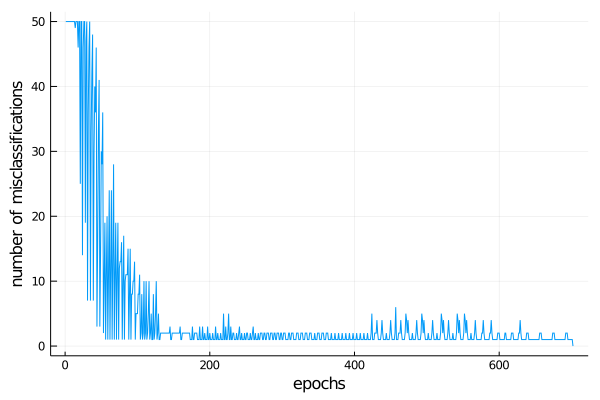

In [31]:
plot(error_points, 
    xaxis = "epochs", 
    yaxis = "number of misclassifications",
    legend = false)

In [19]:
#=========================
#====project==========

LoadError: syntax: incomplete: unterminated multi-line comment #= ... =#

In [20]:
Pkg.add("CSV")
using CSV

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [21]:
data_project=CSV.read("datasets-737503-1278636-heart.csv")

LoadError: ArgumentError: "datasets-737503-1278636-heart.csv" is not a valid file

In [22]:
data=data_project[:,[1,4,5,8,14]]

LoadError: UndefVarError: data_project not defined

In [23]:
X_project = [x for x in zip(data.age[:],data.chol[:],data.thalach[:])]

LoadError: UndefVarError: data not defined

In [24]:
Y_project=data.target
for i=1:length(Y_project)
    if Y_project[i]==0
        Y_project[i]=-1
    end
end
Y_project

LoadError: UndefVarError: data not defined

In [25]:
w,W, error_points= perceptron_learning_algorithm(4,X_project, Y_project,0)

LoadError: UndefVarError: X_project not defined

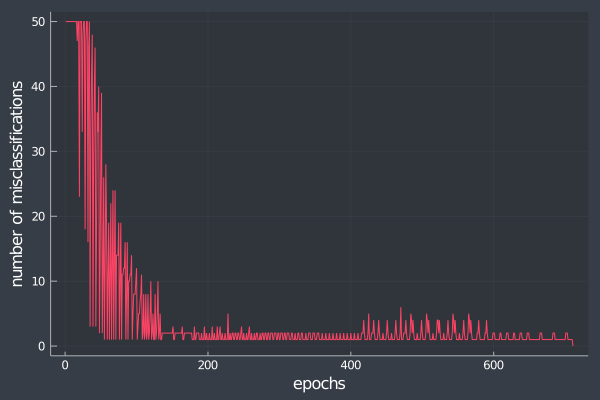

In [26]:
plot(error_points, 
    xaxis = "epochs", 
    yaxis = "number of misclassifications",
    legend = false)